# 1. Generating a sliding window

In [71]:
!pip install --upgrade pip
!pip install opencv-python-headless

In [72]:
!pip install opencv-python-headless

In [73]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

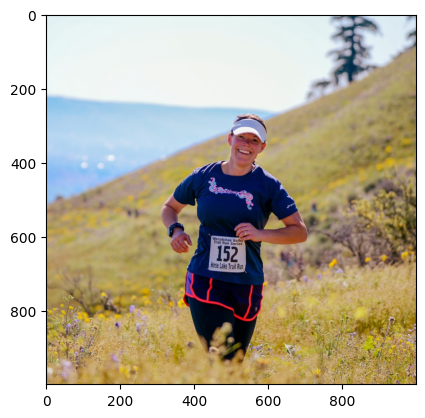

In [74]:
np_image = cv2.imread('/content/pexels-frank-cone-2330502-cropped_e07fcbdc-984c-4f0a-92ab-8fd298a6101d (1).jpg')
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB)
np_image = cv2.resize(np_image, dsize=(1000, 1000))
plt.imshow(np_image)

In [75]:
def sliding_window(image, step, ws):
  for y in range(0, image.shape[0]-ws[1]+1, step):
    for x in range(0, image.shape[1]-ws[0]+1, step):
      yield (x, y, image[y:y + ws[1], x:x +ws[0]])

In [76]:
windows = sliding_window(np_image, 200, (200, 200))


With this, I'm adding a folder called "sliding_window."

In [77]:
os.makedirs('sliding_window')

FileExistsError: ignored

In [78]:
for x, window in enumerate(windows):
  f, axarr = plt.subplots(1, 2, figsize=(12, 12))
  axarr[0].imshow(np_image)
  rect = patches.Rectangle((window[0], window[1]), 200, 200, linewidth=2, edgecolor='g', facecolor='none')
  axarr[0].add_patch(rect)
  axarr[1].imshow(window[2])
  f.savefig('sliding_window/'+str(x)+'.png', dpi=f.dpi)

Output hidden; open in https://colab.research.google.com to view.

In [79]:
image_folder = 'sliding_window'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith('.png')]

In [80]:
images = sorted(images, key=lambda x: int(os.path.splitext(x)[0]))

In [81]:
frame = cv2.imread(os.path.join(image_folder, images[0]))

In [82]:
height, width, layer = frame.shape

In [83]:
video = cv2.VideoWriter(video_name, 0, 1, (width, height))

In [84]:
for image in images:
  video.write(cv2.imread(os.path.join(image_folder, image)))
video.release()

# Working with object detection metrics

In [85]:
import numpy as np

In [86]:
def bb_intersection_over_union(ground_truth_bbox, predicted_bbox):
  xA = max(ground_truth_bbox[0], predicted_bbox[0])
  yA = max(ground_truth_bbox[1], predicted_bbox[1])
  xB = min(ground_truth_bbox[2], predicted_bbox[2])
  yB = min(ground_truth_bbox[3], predicted_bbox[3])

  intersection_area = max(0, xB-xA + 1) * max(0, yB-yA + 1)

  ground_truth_bbox_area = (ground_truth_bbox[2] - ground_truth_bbox[0] + 1) * (ground_truth_bbox[3] - ground_truth_bbox[1] + 1)
  predicted_bbox_area = (predicted_bbox[2] - predicted_bbox[0] + 1) * (predicted_bbox[3] - predicted_bbox[1] + 1)

  iou = intersection_area / float(ground_truth_bbox_area + predicted_bbox_area - intersection_area)

  return iou

In [87]:
image = cv2.imread('/content/pexels-frank-cone-2330502-cropped_e07fcbdc-984c-4f0a-92ab-8fd298a6101d (1).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [88]:
example = ([680, 380, 830, 580], [700, 400, 840, 600])

In [89]:
iou = bb_intersection_over_union(example[0], example[1])

In [90]:
print('Valor IoU ' + str(iou))

Valor IoU 0.677825105057031


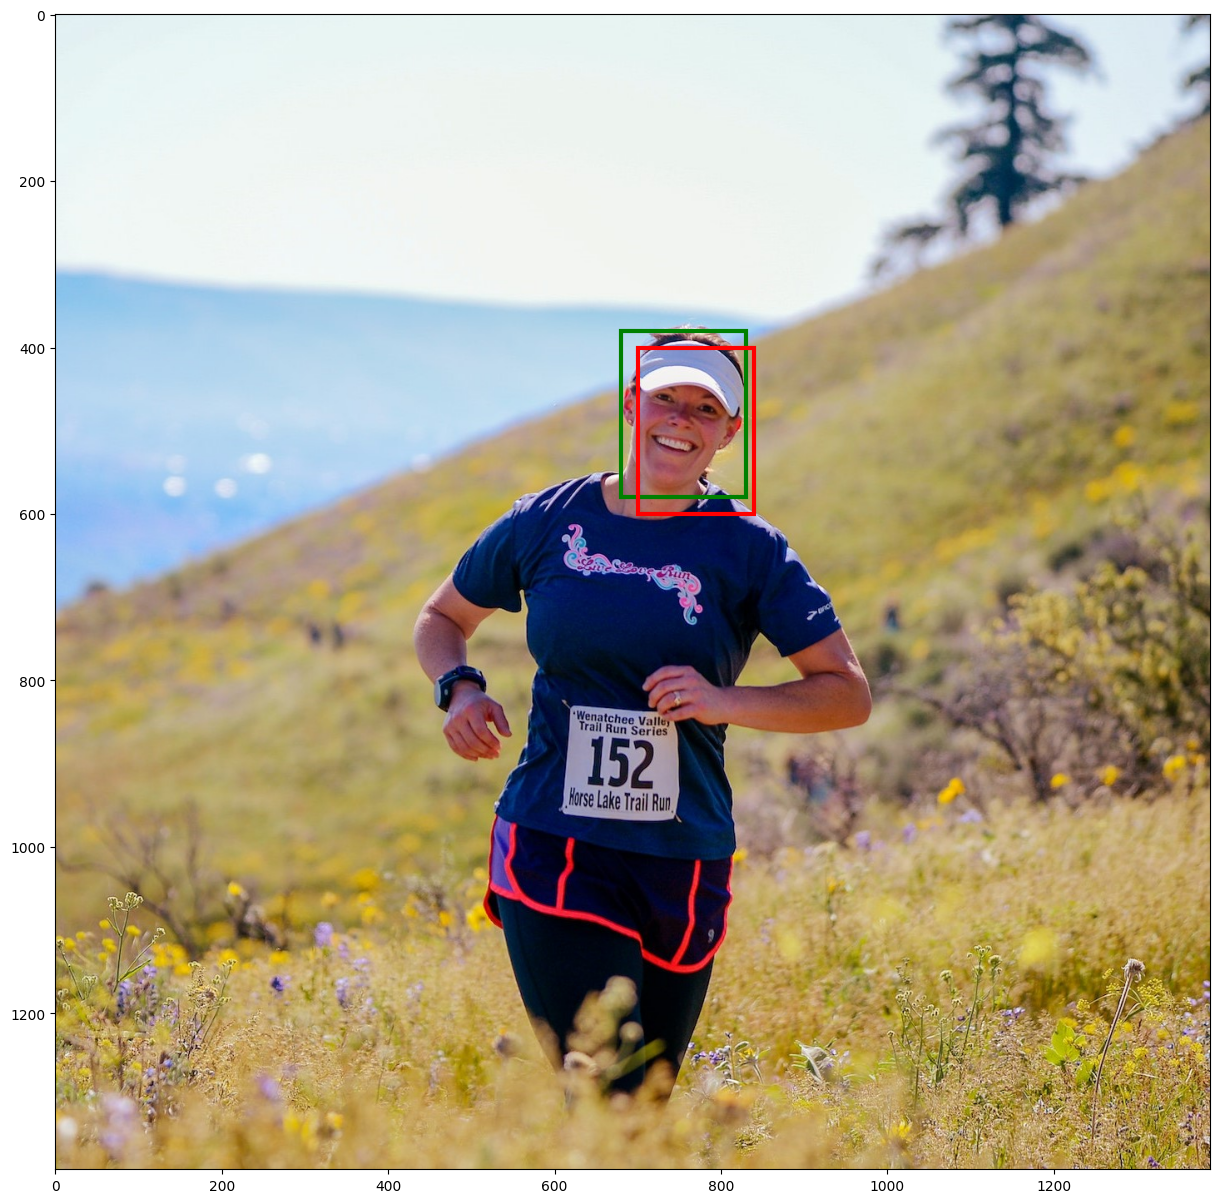

In [91]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.imshow(image)
rect = patches.Rectangle(tuple(example[0][:2]), example[0][2]-example[0][0], example[0][3]-example[0][1], linewidth=3, edgecolor='g', facecolor='none')
ax.add_patch(rect)

rect = patches.Rectangle(tuple(example[1][:2]), example[1][2]-example[1][0], example[1][3]-example[1][1], linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()
